## Algerian Forest Fire

### Goal of the model

Goal of the model is to predict the value of temperature<br>
here is Classes is considered as independent variable and temp is dependent variable<br>

#### Importing Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


C:\Users\Sachin Dev\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Read the data and perform basic functions

In [3]:
data = pd.read_csv('Algerian_forest_fires_dataset.csv')
data.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [4]:
##### Re reading csv but with header=1
data = pd.read_csv('Algerian_forest_fires_dataset.csv',header=1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
data.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [6]:
### We need to delete rows 122 and 123 
data.drop(labels=[122,123],axis=0,inplace=True)
data.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [7]:
#### Top 5 rows
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
#### Bottom 5 rows
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [9]:
#### shape of data
data.shape

(244, 14)

In [10]:
### columns of the dataset
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

##### Here Classes,RH,Rain and WS columns have spaces in it so rename the Classes column

In [11]:
'Classes  '.strip()

'Classes'

In [12]:
for feature in [' RH',' Ws', 'Rain ','Classes  ']:
    data.rename(columns={feature:feature.strip()},inplace=True)

In [13]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

##### check null values and dtypes

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [15]:
## check row with null classes values
data[data['Classes'].isnull().values]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [19]:
### As there is only 1 Nan value so replcaing it with mode
data['Classes'].fillna(data['Classes'].mode()[0],inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [22]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

here we just need 2 labels fire or not fire

In [23]:
data['Classes'] = data['Classes'].str.strip()

In [24]:
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

##### replacing fire and not fire with 1 and 0 respectively

In [26]:
data['Classes'] = data['Classes'].map({'not fire':0, 'fire':1})

In [27]:
data['Classes'].unique()

array([0, 1], dtype=int64)

In [28]:
#### adding region column 
#### 0 for Bejaia and 1 for Sidi-Bel Abbes
data['Region'] = 0
data['Region'].iloc[122:] = 1

In [29]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


##### Check Datatypes of each column

In [30]:
data.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes         int64
Region          int64
dtype: object

##### do some data cleaning

In [32]:
### as we have space in 14.6 9 it will create an issue when converitng to float
data[data['DC'] == '14.6 9']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,1,1


In [34]:
data['DC'].replace('14.6 9','14.69',inplace=True)

In [36]:
data[data['DC'] == '14.69']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,1,1


In [38]:
#### similarly FWI column contains float values but there is one value fire in it
####  will replace fire with the mode 
data.iloc[165]['FWI']

'fire   '

In [40]:
data['FWI'].replace('fire   ',data['FWI'].mode()[0],inplace=True)

In [41]:
data.iloc[165]['FWI']

'0.4'

##### changing datatypes of columns

In [43]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


In [45]:
for feature in ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']:
    data[feature] = data[feature].astype(str).astype(int)

In [46]:
### float 
for feature in ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    data[feature] = data[feature].astype(str).astype(float)

In [47]:
data.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

In [49]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.008197,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.437383,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


### Exploring Data

In [50]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print(f"We have {len(numeric_features)} categorical_features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical_features: {categorical_features}")

We have 15 categorical_features: ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']
We have 0 categorical_features: []


In [55]:
data['year'].unique()

array([2012])

##### as we know the data is present only for year 2012 so we can drop this column 

In [58]:
data.drop('year',axis=1,inplace=True)
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


##### Correlation

In [59]:
data.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350909,0.201784,4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084119,0.022333,-9.586232e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558800,0.518119,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570483,-0.435023,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029001,-0.066529,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322810,-0.379449,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686342,0.770114,2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874924,0.584188,1.910937e-01
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740175,0.507132,-8.148217e-02
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.908054,0.735511,2.684206e-01


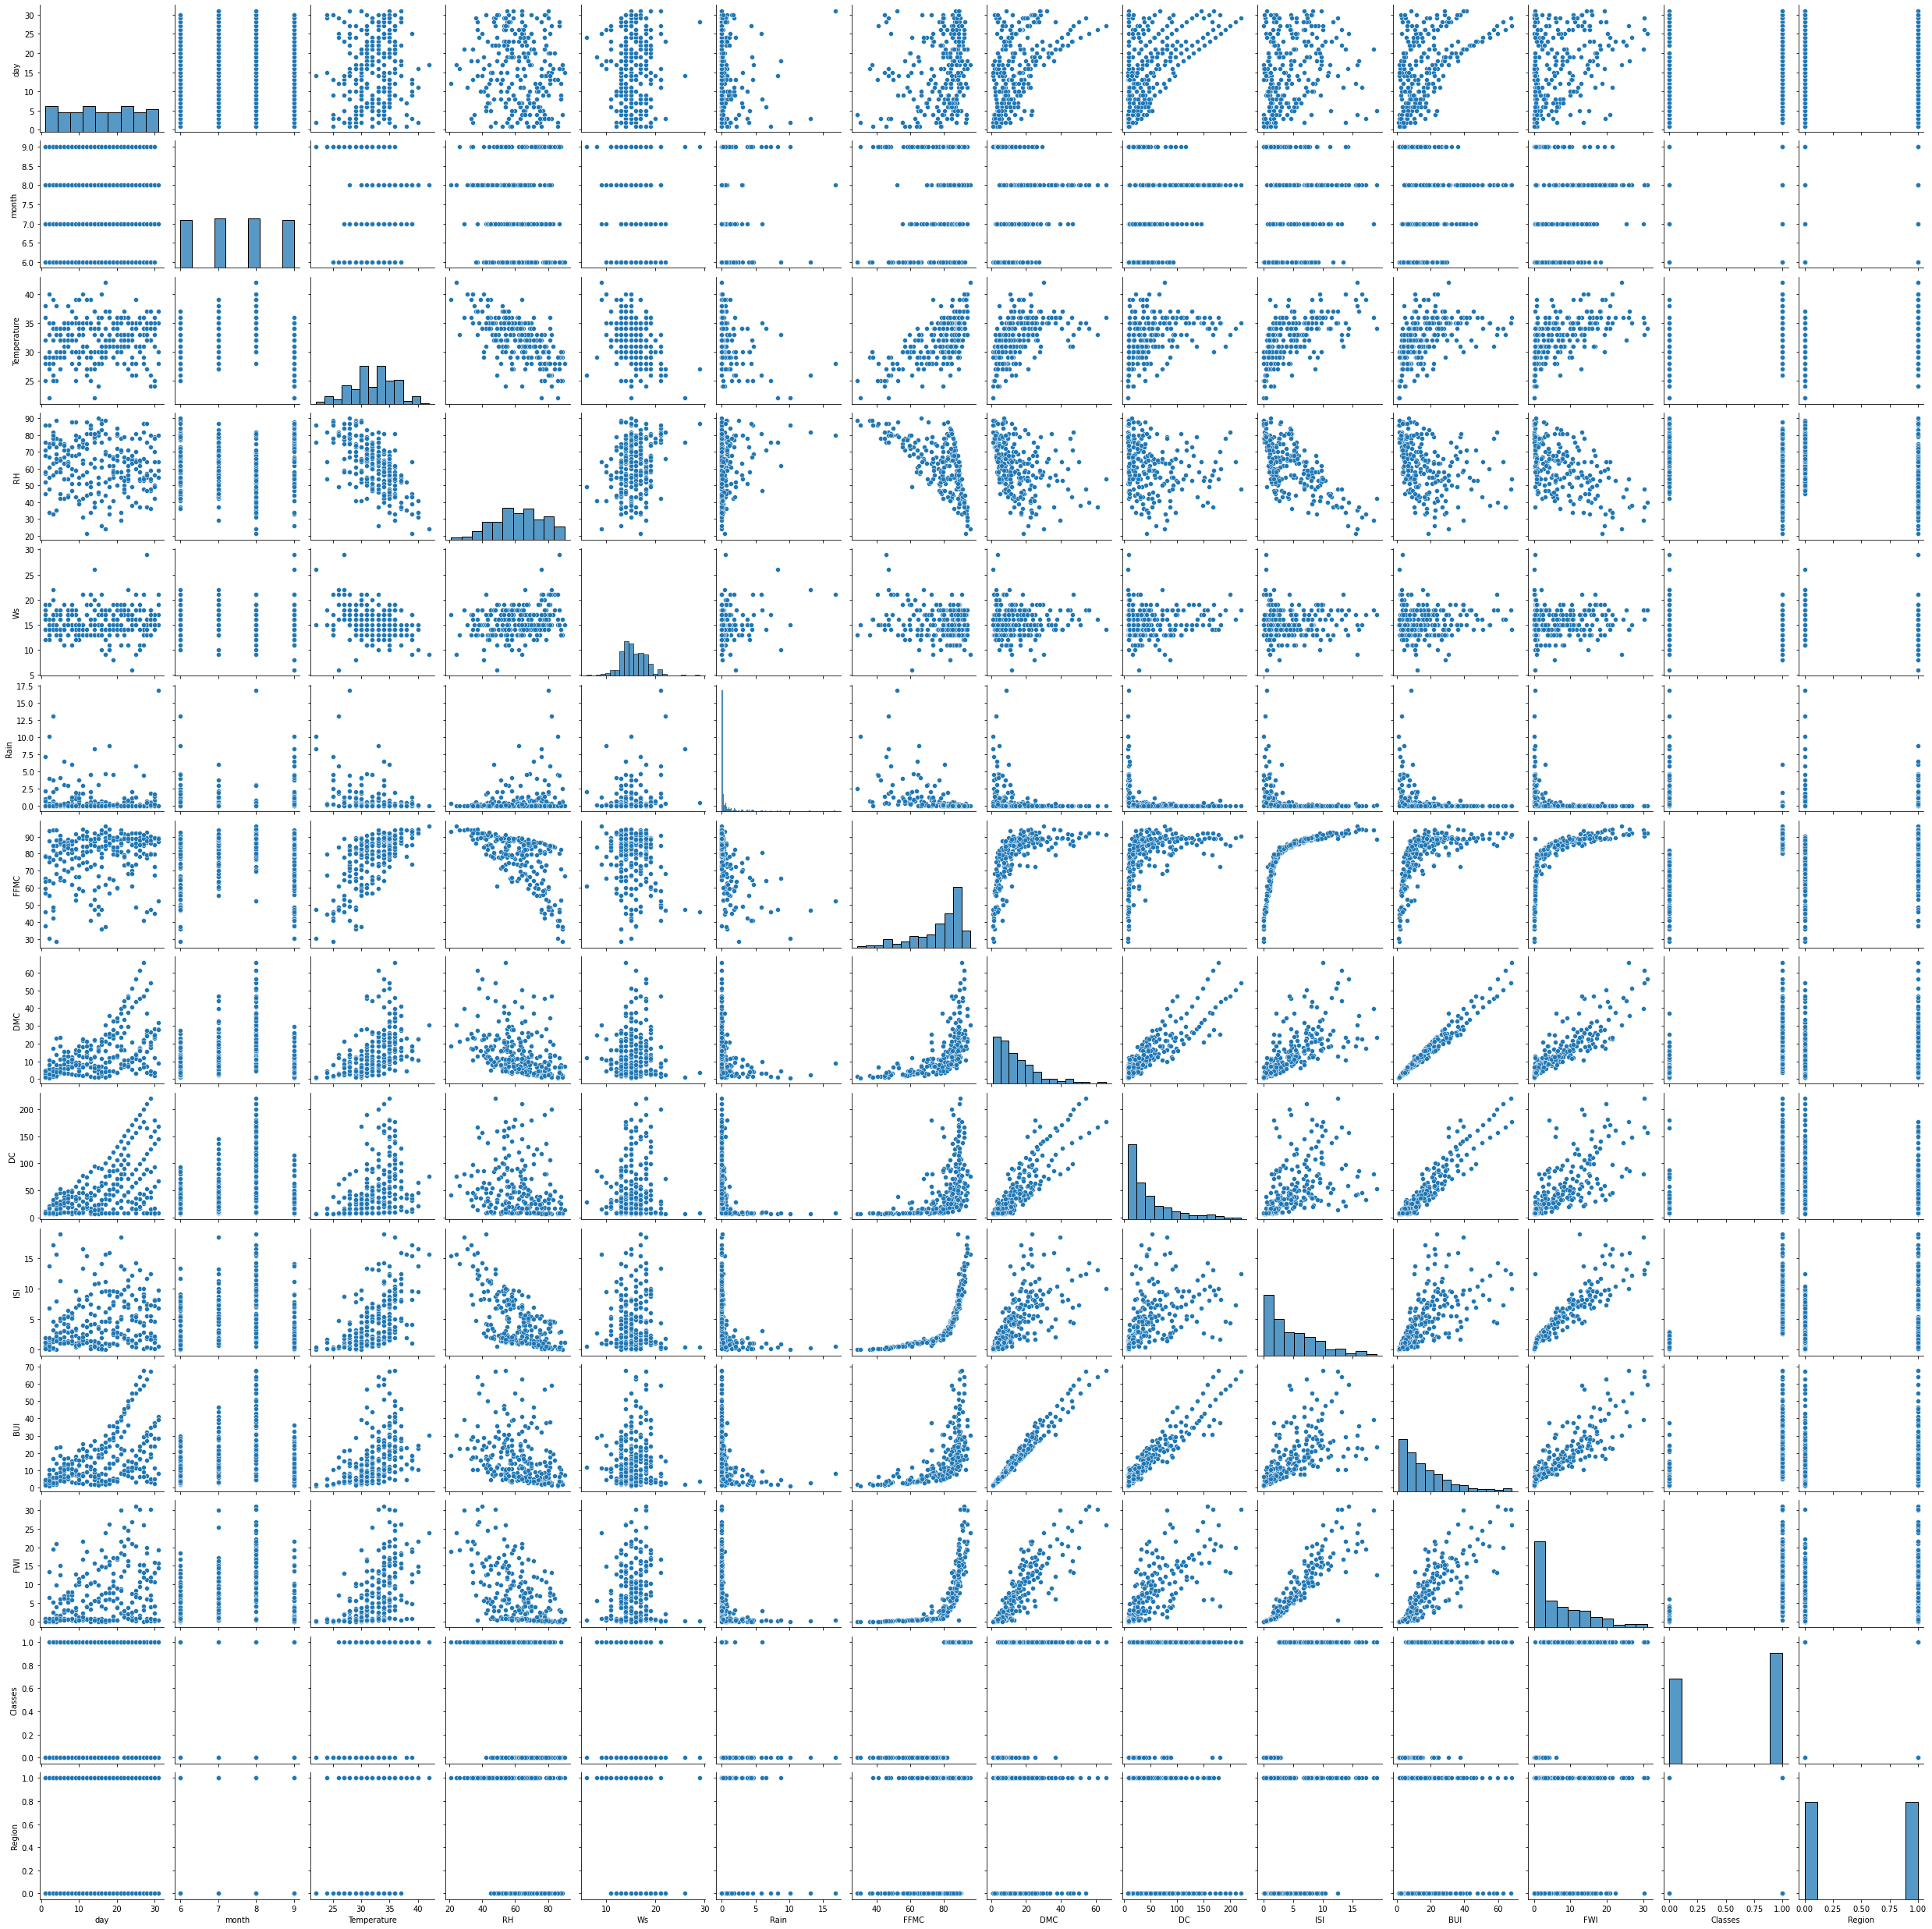

In [60]:
sns.pairplot(data)

<AxesSubplot: >

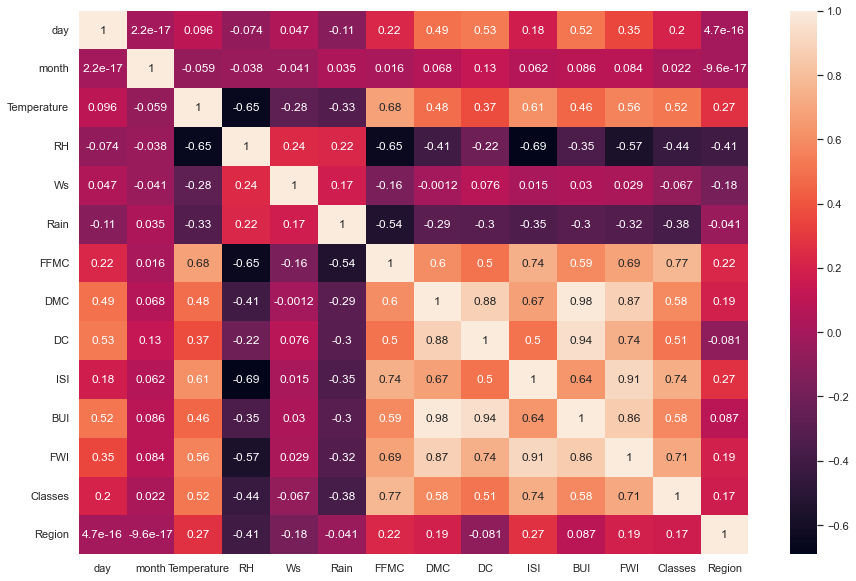

In [63]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(),annot=True)

**Observations**
1. Tamperature have positive correlation with FFMC,ISI and FWI
2. Temperature have negative correlation with RH.
3. ISI and FWI have very strong correlation.
4. DMC and DC have very strong correlation with BUI.
5. Temp and rain are -ve skewed.

##### Check distribution of the data

In [68]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
numeric_features

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

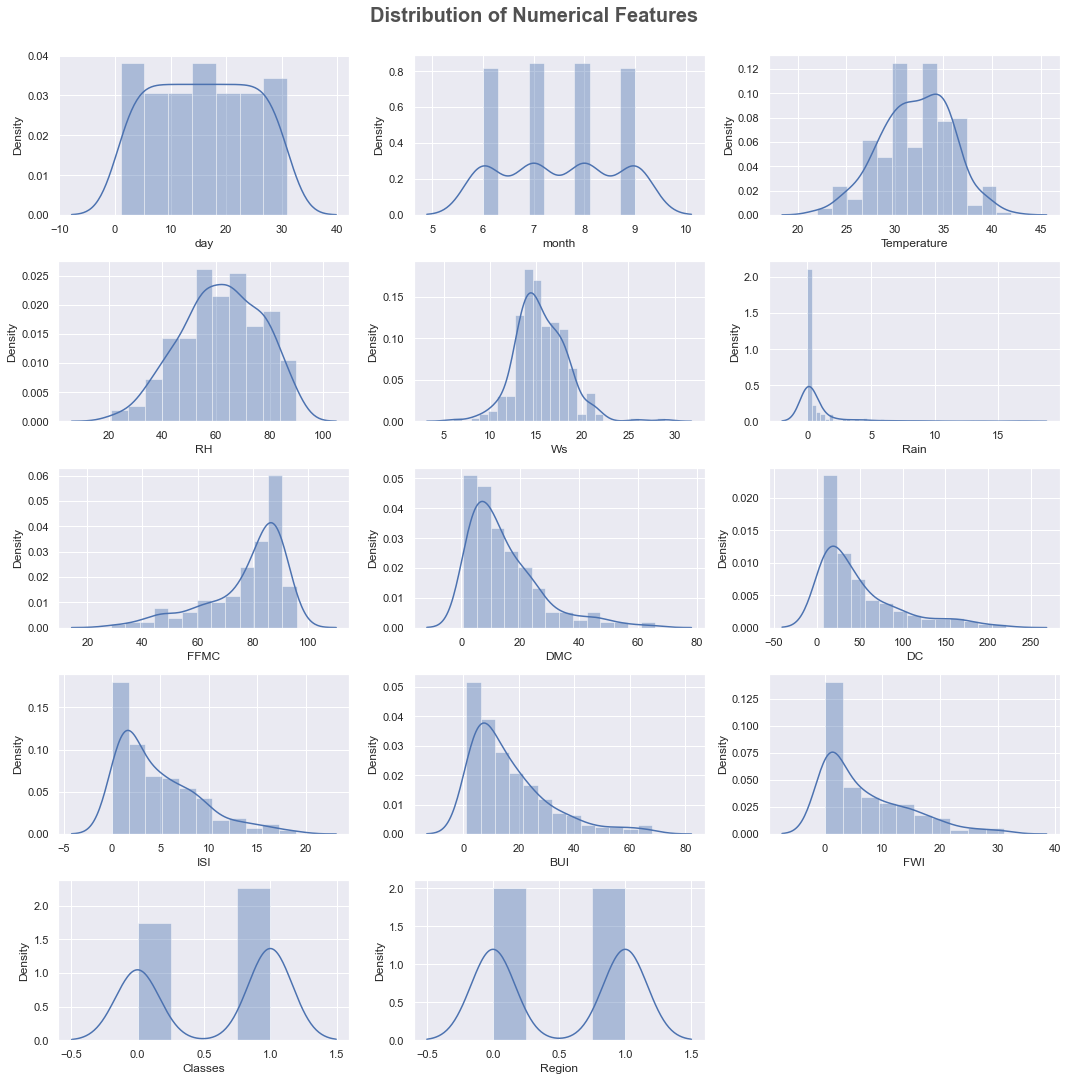

In [69]:
plt.figure(figsize=(15,15))
plt.suptitle("Distribution of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.distplot(x=data[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Observations**
1. Rain, DMC, DC, ISI, BUI, FWI are Right Skewed or Positively Skewed.
2. FFMC is left skewed.
3. Ws is slightly right skewed and RH is slightly left skewed.

##### check OUTLIERS

<AxesSubplot: >

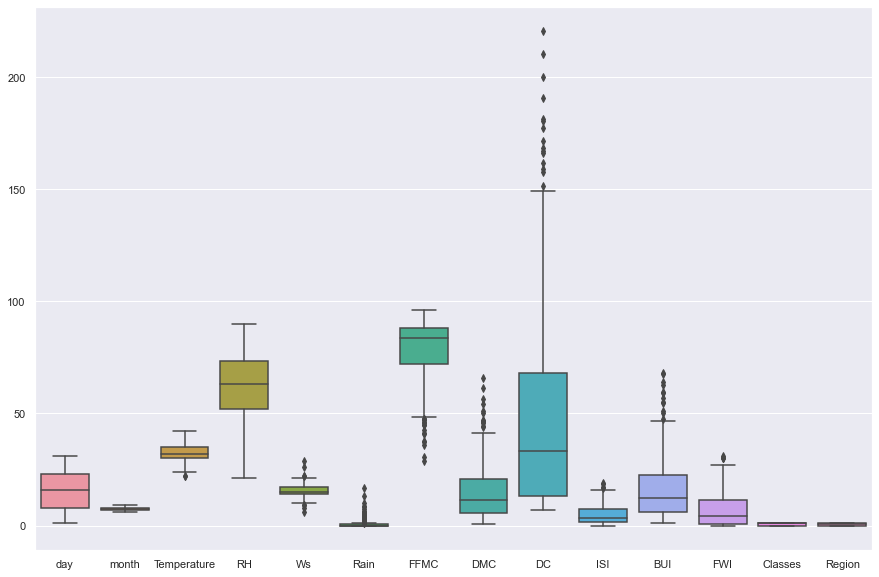

In [70]:
plt.figure(figsize=(15,10))
plt.grid(True)
sns.boxplot(data=data[numeric_features],orient='v')

I am not removing outliers as I want to create different models and can use MAE and Huber loss which are robust to outliers.

Text(0, 0.5, 'Temperature')

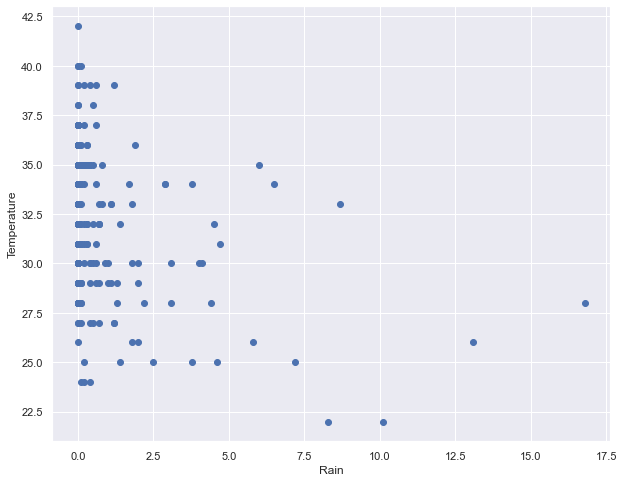

In [72]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(data['Rain'], data['Temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

Temp and rain are inversely proportinal

Text(0, 0.5, 'Temperature')

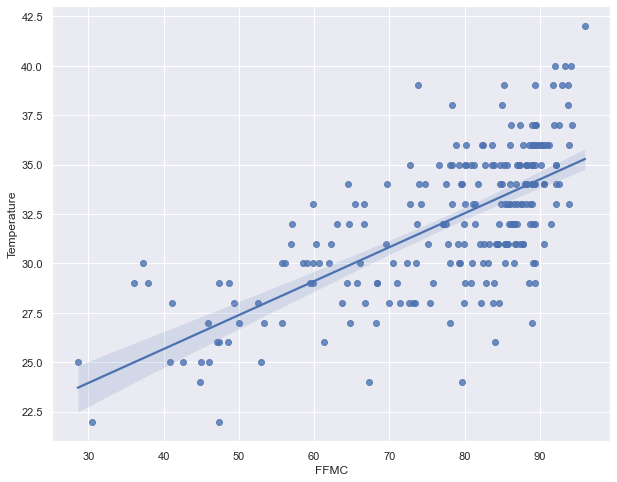

In [76]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='FFMC', y='Temperature',data=data)
plt.xlabel('FFMC')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

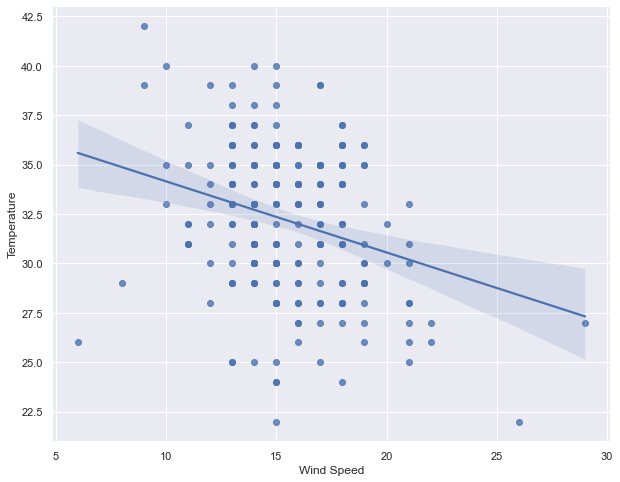

In [77]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='Ws', y='Temperature', data=data)
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')


Text(0, 0.5, 'Temperature')

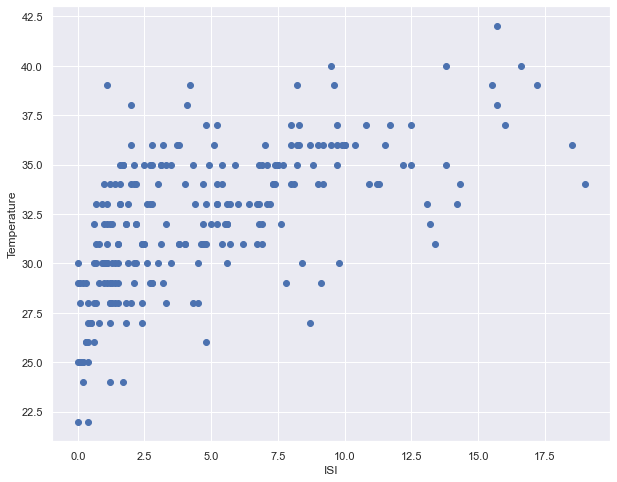

In [78]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(data['ISI'], data['Temperature'])
plt.xlabel('ISI')
plt.ylabel('Temperature')

Positive correlation b/w ISI and Temp

In [79]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [80]:
### remove day and month form dataset as this is not relvant in this dataset.

In [82]:
data.drop(['day','month'],axis=1,inplace=True)

In [84]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


### Training the model

##### Independent and Dependent Features

In [92]:
x = data.iloc[:,1::] ### every column except the first one i.e. at 0th index
y = data.iloc[:,0] ### first column 

In [93]:
x.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [94]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int32

##### Train test Split

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25)

In [96]:
X_train.shape

(183, 11)

In [97]:
X_test.shape

(61, 11)

In [98]:
y_train.shape

(183,)

In [99]:
y_test.shape

(61,)

##### Standardize or Feature Scaling the dataset

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

In [103]:
scaler

StandardScaler()

In [104]:
#### Standardizing the data
X_train = scaler.fit_transform(X_train)

In [105]:
### we don't want to fit transform the x_test, we just want to tranform it to avoid data leakage
X_test = scaler.transform(X_test)

In [106]:
X_train

array([[ 1.06071338,  0.23246207, -0.43030685, ..., -0.86430123,
        -1.1098231 , -0.95197164],
       [-0.55981026, -0.52046817, -0.43030685, ...,  2.59438026,
         0.9010445 ,  1.05045146],
       [-0.70072536,  0.9853923 , -0.43030685, ...,  1.04067568,
         0.9010445 , -0.95197164],
       ...,
       [-1.1939282 , -0.89693329, -0.04742442, ..., -0.2968613 ,
         0.9010445 ,  1.05045146],
       [-1.3348433 , -0.14400305,  0.78215418, ..., -0.5130289 ,
         0.9010445 ,  1.05045146],
       [-1.82804615, -0.89693329, -0.04742442, ...,  0.04090056,
         0.9010445 ,  1.05045146]])

In [107]:
X_test

array([[ 1.44765239e-01, -5.20468169e-01, -4.30306846e-01,
         1.16038012e-01, -7.40691403e-01, -6.94018786e-01,
        -6.02322149e-01, -7.49170133e-01, -7.96748861e-01,
        -1.10982310e+00,  1.05045146e+00],
       [-1.75758860e+00, -8.96933288e-01, -4.30306846e-01,
         1.03715697e+00,  9.73804997e-01,  6.22823052e-02,
         1.78132697e+00,  7.04286420e-01,  1.55407371e+00,
         9.01044498e-01,  1.05045146e+00],
       [-1.47575840e+00, -2.77925888e+00, -3.66493108e-01,
         4.32452922e-01,  7.94562192e-01,  7.49085459e-01,
        -4.76866933e-01,  8.25971154e-01, -1.75267031e-01,
         9.01044498e-01,  1.05045146e+00],
       [-2.07522509e-01,  6.08927186e-01, -4.30306846e-01,
         6.78553408e-01,  7.45248063e-03,  1.56308927e-01,
         5.76956887e-01,  8.23422203e-02,  4.05683376e-01,
         9.01044498e-01, -9.51971638e-01],
       [-1.89850370e+00, -1.44003051e-01, -4.30306846e-01,
         1.12856572e+00,  6.46492048e-01, -1.35991224e-01,
  

### Model Training

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
regression = LinearRegression()

In [111]:
regression

LinearRegression()

In [112]:
regression.fit(X_train,y_train)

LinearRegression()

In [114]:
### printing coffficient
print(regression.coef_)

[-1.06531402 -0.66712181 -0.19795437  1.11111554  1.11638503 -0.11844867
  0.08674218 -0.40113895 -0.0171941  -0.00351776 -0.00285645]


In [115]:
### print intercept
print(regression.intercept_)

32.08743169398907


##### Predict the data

In [116]:
reg_pred = regression.predict(X_test)

In [117]:
reg_pred

array([32.01272599, 36.71463399, 36.48919491, 32.74080741, 36.31724665,
       31.34228612, 35.90392961, 35.4768441 , 30.97703833, 33.0672238 ,
       27.43752481, 26.68278588, 29.80573342, 32.82109842, 32.53702138,
       33.32683679, 31.00057213, 31.34623635, 34.51164451, 32.00997248,
       28.98233443, 32.49895084, 33.04327412, 29.07258081, 32.06902527,
       32.03767075, 25.04993105, 36.96408018, 29.71143824, 28.3803472 ,
       32.71097225, 31.32069618, 30.65000719, 36.47800553, 31.82180898,
       33.42828618, 31.99055382, 34.56553102, 33.17702602, 29.61370874,
       24.30442705, 23.73130518, 32.95487545, 34.46890121, 32.67737025,
       29.38429181, 37.62873218, 32.42332665, 30.86393639, 31.95441789,
       31.31648309, 27.41475769, 33.48205323, 28.33988028, 32.52054957,
       32.2452116 , 32.56901383, 33.60195853, 39.16460209, 32.0500771 ,
       31.08807008])

### Assumptions of Linear Regression

1. If the model is good, there should be a linear relationship between y_test(truth points) and reg_pred(predicted points)

Text(0, 0.5, 'Test Predicted Points')

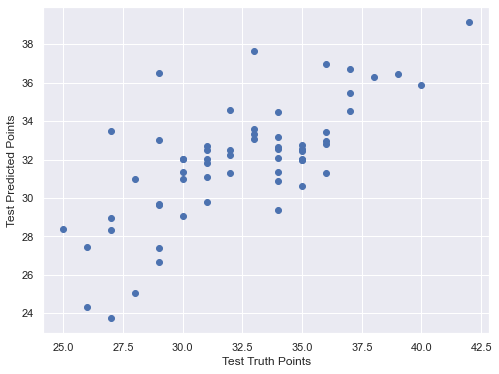

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,reg_pred)
plt.xlabel('Test Truth Points')
plt.ylabel('Test Predicted Points')

##### Calculating the residuals

Residuals = y_test - reg_pred

In [120]:
residuals = y_test - reg_pred
residuals

127   -2.012726
151    0.285366
234   -7.489195
69     2.259193
188    1.682753
         ...   
48     2.430986
155   -0.601959
201    2.835398
5     -1.050077
169   -0.088070
Name: Temperature, Length: 61, dtype: float64

2. When we are creating displot for residuals it should approximately coming up like the Gaussian distribution

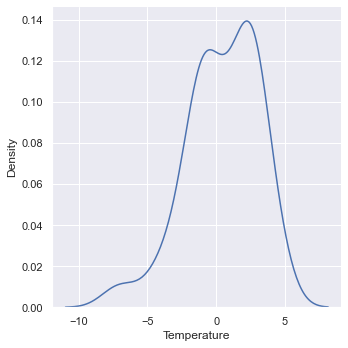

In [121]:
sns.displot(residuals,kind='kde')

##### Scatter plot with predictions and residuals
##### Uniform distribution

Text(0, 0.5, 'Residuals')

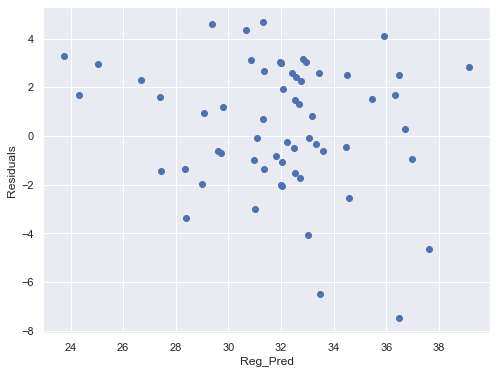

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(reg_pred,residuals)
plt.xlabel('Reg_Pred')
plt.ylabel('Residuals')

### Performance Matrics

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))

### Root mean squared error
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.9704256061714265
2.1728865536543687
2.640156360174796


##### R Squared

In [126]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.4845597440269499


Accuracy is less than 50% this is a really bad model

##### Adjusted R Squared

In [127]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.36884866615544887

### Ridge Regression

Main aim of Ridge Regression is reduce Overfitting

In [129]:
from sklearn.linear_model import Ridge

In [130]:
ridge = Ridge()

In [131]:
ridge.fit(X_train,y_train)

Ridge()

In [132]:
ridge_pred = ridge.predict(X_test)

##### Assumptions

Text(0, 0.5, 'Test Predicted Points')

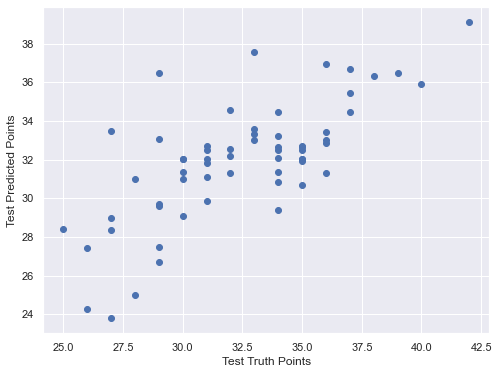

In [133]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,ridge_pred)
plt.xlabel('Test Truth Points')
plt.ylabel('Test Predicted Points')

In [134]:
### residuals
residuals = y_test - ridge_pred
residuals

127   -2.028842
151    0.297709
234   -7.507083
69     2.269209
188    1.675891
         ...   
48     2.355433
155   -0.600324
201    2.868783
5     -1.029379
169   -0.082304
Name: Temperature, Length: 61, dtype: float64

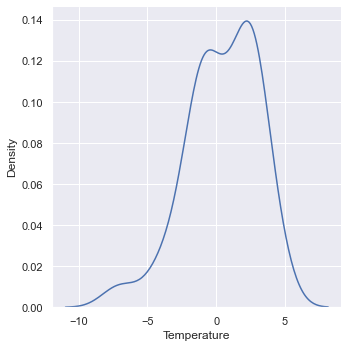

In [135]:
sns.displot(residuals, kind='kde')

Text(0, 0.5, 'Residuals')

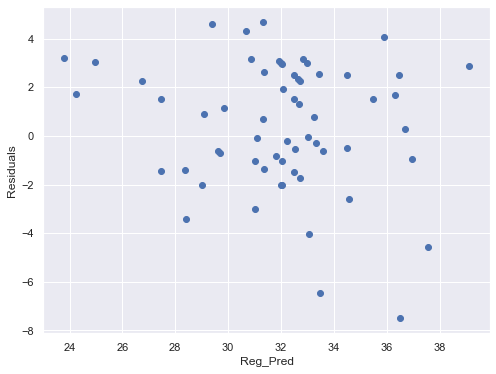

In [136]:
plt.figure(figsize=(8,6))
plt.scatter(ridge_pred,residuals)
plt.xlabel('Reg_Pred')
plt.ylabel('Residuals')

##### Performance Metrics

In [137]:
print(mean_squared_error(y_test, ridge_pred))
print(mean_absolute_error(y_test, ridge_pred))
print(np.sqrt(mean_squared_error(y_test, ridge_pred)))

6.949241028355304
2.1681697732902125
2.6361413141854335


##### R-Squared

In [138]:
score = r2_score(y_test,ridge_pred)
print(score)

0.48612627451291557


It has almost same accuracy as Linear Regression model

##### Adjusted R Square

In [139]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.37076686675050885

### Lasso 

In [140]:
from sklearn.linear_model import Lasso

In [141]:
lasso = Lasso()

In [142]:
lasso.fit(X_train,y_train)

Lasso()

In [143]:
### printing coffficient
print(lasso.coef_)

[-0.64987797 -0.         -0.          1.03018573  0.          0.
  0.          0.          0.          0.          0.        ]


In [144]:
#### print intercept
print(lasso.intercept_)

32.08743169398907


In [145]:
##### prediction
lasso_pred = lasso.predict(X_test)

In [146]:
lasso_pred

array([32.11289266, 34.29811412, 33.4920014 , 32.92133204, 34.48385973,
       31.42421453, 34.49343008, 33.34818242, 31.59393723, 32.41506476,
       29.06229038, 27.83165394, 30.35579339, 33.32645134, 32.28959534,
       33.02015335, 30.97695163, 31.45604338, 34.03734122, 32.35711523,
       31.21002157, 32.22233917, 33.46614443, 29.98403845, 32.31624345,
       32.22233917, 29.43171865, 34.76583628, 31.10321219, 29.09438294,
       32.64168215, 32.30820862, 31.35283246, 35.06695354, 32.63803693,
       32.74230269, 32.57442597, 33.38181051, 32.39486921, 30.40549113,
       28.94898168, 28.63311334, 33.05404515, 33.78692981, 33.010583  ,
       30.71306094, 34.27638305, 32.6745191 , 31.50833149, 32.9927141 ,
       32.12944299, 28.74176871, 33.07577622, 29.54270069, 32.36435892,
       32.39825072, 32.97203788, 33.43949633, 35.14689786, 32.20732436,
       31.61233355])

##### Assumptions

Text(0, 0.5, 'Test Predicted Points')

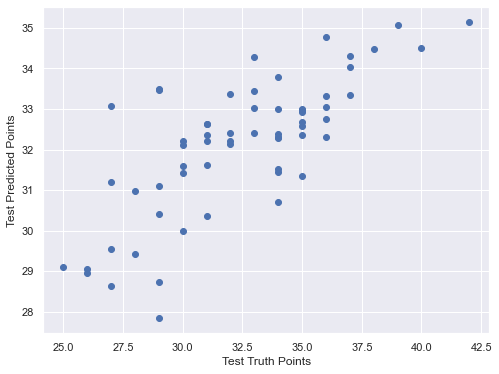

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,lasso_pred)
plt.xlabel('Test Truth Points')
plt.ylabel('Test Predicted Points')

In [148]:
### residuals
residuals = y_test - lasso_pred
residuals

127   -2.112893
151    2.701886
234   -4.492001
69     2.078668
188    3.516140
         ...   
48     2.027962
155   -0.439496
201    6.853102
5     -1.207324
169   -0.612334
Name: Temperature, Length: 61, dtype: float64

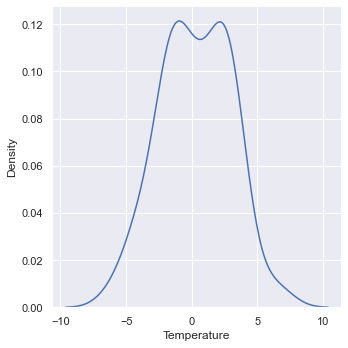

In [149]:
sns.displot(residuals, kind='kde')

Text(0, 0.5, 'Residuals')

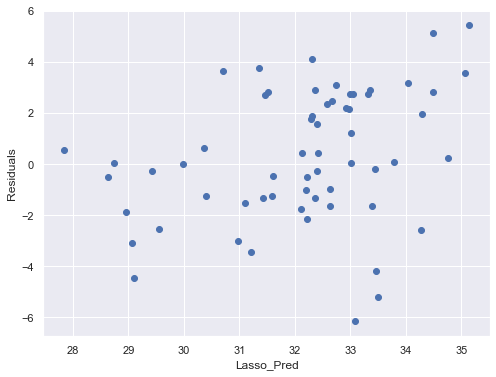

In [161]:
plt.figure(figsize=(8,6))
plt.scatter(lasso_pred,residuals)
plt.xlabel('Lasso_Pred')
plt.ylabel('Residuals')

##### Performance Metrics

In [151]:
print(mean_squared_error(y_test, lasso_pred))
print(mean_absolute_error(y_test, lasso_pred))
print(np.sqrt(mean_squared_error(y_test, lasso_pred)))

7.184363191911266
2.2361837073155595
2.6803662421227563


##### R-Squared

In [164]:
score = r2_score(y_test,lasso_pred)
print(score)

0.46873975681435176


Accuracy didn't improve

##### Adjusted R-Square

In [165]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.34947725324206336

### Elastic Net

In [154]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic

ElasticNet()

In [155]:
elastic.fit(X_train, y_train)

ElasticNet()

In [156]:
elastic_pred = elastic.predict(X_test)

##### Assumptions

Text(0, 0.5, 'Test Predicted Points')

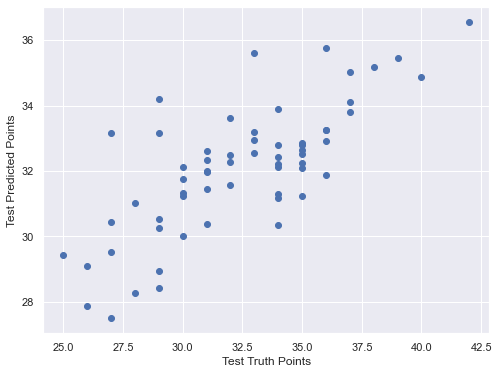

In [157]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,elastic_pred)
plt.xlabel('Test Truth Points')
plt.ylabel('Test Predicted Points')

In [158]:
### residuals
residuals = y_test - elastic_pred
residuals

127   -1.770612
151    1.961832
234   -5.193657
69     2.208036
188    2.818547
         ...   
48     2.150146
155   -0.208482
201    5.442619
5     -0.999168
169   -0.454350
Name: Temperature, Length: 61, dtype: float64

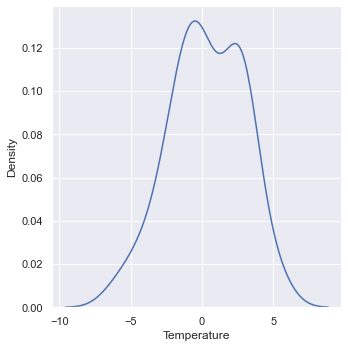

In [160]:
sns.displot(residuals, kind='kde')

Text(0, 0.5, 'Residuals')

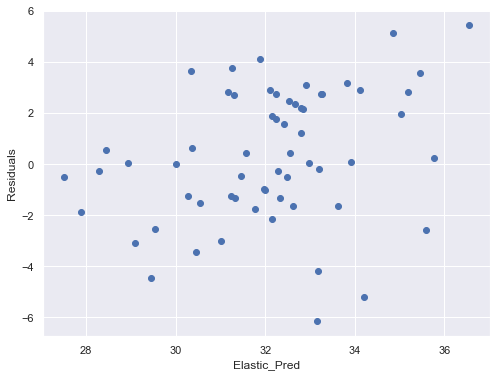

In [162]:
plt.figure(figsize=(8,6))
plt.scatter(elastic_pred,residuals)
plt.xlabel('Elastic_Pred')
plt.ylabel('Residuals')

##### Performance Matrics

In [163]:
print(mean_squared_error(y_test, elastic_pred))
print(mean_absolute_error(y_test, elastic_pred))
print(np.sqrt(mean_squared_error(y_test, elastic_pred)))

6.658974056328835
2.1138151011073836
2.5804987999084275


##### R-Squared and Adjusted R-Squared

In [166]:
score = r2_score(y_test,elastic_pred)
print(score)

0.50759057107314


In [167]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.39704967886506937

### Huber Loss

In [169]:
from sklearn.linear_model import HuberRegressor

In [170]:
huber = HuberRegressor()

In [171]:
huber.fit(X_train,y_train)

HuberRegressor()

In [172]:
print(huber.coef_)

[-1.1951526  -0.68209785 -0.27265153  1.01511898  0.80635848 -0.10401702
 -0.0646975  -0.09351784  0.02236856 -0.01991123  0.13304828]


In [173]:
print(huber.intercept_)

32.18911667226555


##### Prediction 

In [174]:
huber_pred = huber.predict(X_test)

In [175]:
huber_pred

array([32.33421962, 36.82589007, 37.02180853, 32.63712398, 36.29939078,
       31.65824889, 35.96956552, 35.66429453, 31.36808324, 33.13703618,
       27.52604574, 26.85778739, 30.21569293, 32.74142579, 32.40549854,
       33.44812147, 31.05028983, 31.6226769 , 34.46995046, 32.10512042,
       29.13813877, 32.43270352, 33.16076873, 29.34521636, 32.12275153,
       31.82523618, 24.32088214, 36.88109376, 29.75816286, 28.49334874,
       32.63994972, 31.43121456, 30.8975223 , 36.57685933, 31.98428066,
       33.58195426, 31.85477023, 34.78733503, 33.65381311, 29.5648316 ,
       23.80745994, 24.01734233, 32.90086674, 34.52378427, 32.74749765,
       29.47525297, 37.71286034, 32.95840517, 30.74292801, 32.02315571,
       31.42836178, 27.77910718, 33.50308827, 28.69487814, 32.41568477,
       32.07085347, 32.50820261, 33.80552983, 39.27245984, 32.00786616,
       31.03508798])

##### Assumptions

Text(0, 0.5, 'Test Predicted Points')

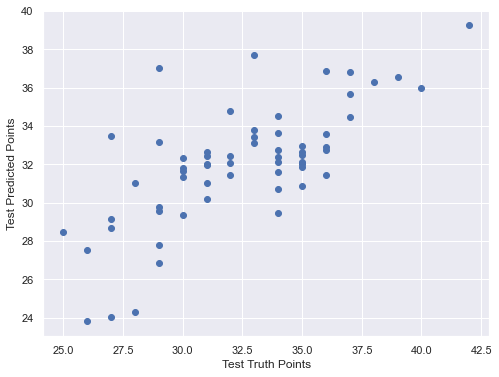

In [176]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,huber_pred)
plt.xlabel('Test Truth Points')
plt.ylabel('Test Predicted Points')

In [177]:
residuals = y_test - huber_pred
residuals

127   -2.334220
151    0.174110
234   -8.021809
69     2.362876
188    1.700609
         ...   
48     2.491797
155   -0.805530
201    2.727540
5     -1.007866
169   -0.035088
Name: Temperature, Length: 61, dtype: float64

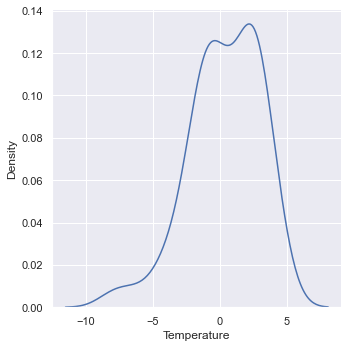

In [178]:
sns.displot(residuals,kind='kde')

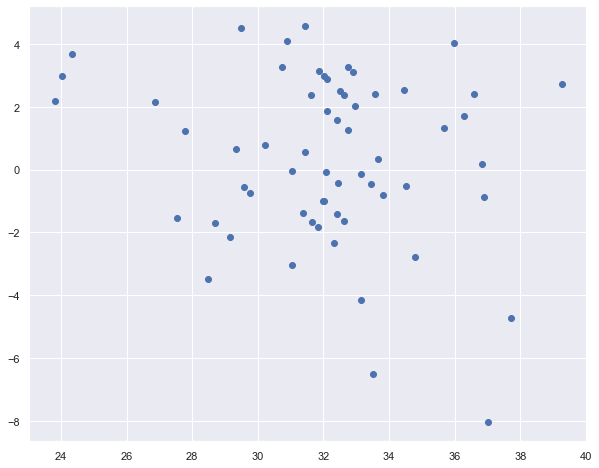

In [179]:
plt.scatter(huber_pred,residuals)

##### Performance Matrics

In [180]:
print(mean_squared_error(y_test,huber_pred))
print(mean_absolute_error(y_test,huber_pred))
print(np.sqrt(mean_squared_error(y_test,huber_pred)))

7.131295984862456
2.1757195937310287
2.6704486486099026


##### R-Squared and Adjusted R-Squared

In [181]:
score = r2_score(y_test,reg_pred)
print(score)

0.4845597440269499


Accuracy is still bad.

In [182]:
#### adjusted r square
1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.36884866615544887